### *Importing Libraries and loading Data*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
admissions_df = pd.read_csv("./admissions.csv")

In [3]:
admissions_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [4]:
admissions_df.shape

(2079, 7)

In [5]:
admissions_df.columns

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex', 'Value'],
      dtype='object')

In [6]:
# Information about Dataset
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


### *Exploratory of Data Analysis*

In [7]:
# Summary Statistics of Numerical Columns
admissions_df.describe()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2014/15,All codes,All admissions,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


In [8]:
# Summary Statistics of categorical Columns
admissions_df.describe(include='object')

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2014/15,All codes,All admissions,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


### *Handling Missing Value*

In [9]:
# Check missing value
admissions_df.isnull().sum()

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64

In [10]:
admissions_df.isnull().mean()

Year               0.000000
ICD10 Code         0.000000
ICD10 Diagnosis    0.000000
Diagnosis Type     0.000000
Metric             0.000000
Sex                0.333333
Value              0.000481
dtype: float64

In [11]:
# Fill Null Value with Unknown
admissions_df['Sex'] = admissions_df['Sex'].fillna("Unknown")

In [12]:
# Fill Null Value with 0
admissions_df['Value'] = admissions_df['Value'].fillna(0)

In [13]:
admissions_df['Sex']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
2074     Female
2075     Female
2076     Female
2077     Female
2078     Female
Name: Sex, Length: 2079, dtype: object

In [14]:
admissions_df.isnull().sum()

Year               0
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
dtype: int64

### *Data Preparation, Analysis and Visualizations*

In [15]:
admissions_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,Unknown,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,Unknown,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,Unknown,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,Unknown,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,Unknown,907157


In [16]:
# Selecting only Year in this admissions_df['Year'] columns
for i in range(0, len(admissions_df['Year'])):
    admissions_df['Year'][i] = (admissions_df['Year'][i])[:4]

In [17]:
admissions_df['Year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2074    2004
2075    2004
2076    2004
2077    2004
2078    2004
Name: Year, Length: 2079, dtype: object

In [18]:
admissions_count = admissions_df['Year'].value_counts()
admissions_count

Year
2014    189
2013    189
2012    189
2011    189
2010    189
2009    189
2008    189
2007    189
2006    189
2005    189
2004    189
Name: count, dtype: int64

In [19]:
diagnosis_ICD10 = admissions_df['ICD10 Diagnosis'].value_counts()
diagnosis_ICD10

ICD10 Diagnosis
All admissions                                 66
Chronic Obstructive Lung Disease               66
Hip Fracture 55+                               66
Age Related Cataract 45+                       66
Periodontal Disease / Periodonitis             66
Crohns Disease                                 66
Stomach / Duodenal Ulcer                       66
Atherosclerosis                                66
Aortic Aneurysm                                66
Cerebrovascular Disease                        66
Other arterial disease                         66
Ischaemic Heart Disease                        66
Other Heart Disease                            66
Pneumonia, Influenza                           66
Chronic Airway Obstruction                     66
Myeloid Leukaemia                              66
Unspecified Site                               66
Pancreas                                       66
Stomach                                        66
Kidney and Renal Pelvis           

In [20]:
diagnosis_type = admissions_df['Diagnosis Type'].value_counts()
diagnosis_type

Diagnosis Type
Cancers which can be caused by smoking                      726
Circulatory diseases which can be caused by smoking         396
Respiratory diseases which can be caused by smoking         198
Digestive diseases which can be caused caused by smoking    198
Other diseases which can be caused by smoking               198
All admissions                                               66
All cancers                                                  66
All respiratory diseases                                     66
All circulatory diseases                                     66
All diseases of the digestive system                         66
All diseases which can be caused by smoking                  33
Name: count, dtype: int64

In [21]:
metric = admissions_df['Metric'].value_counts()
metric

Metric
Number of admissions    1056
Attributable number     1023
Name: count, dtype: int64

In [22]:
gender = admissions_df['Sex'].value_counts()
gender

Sex
Unknown    693
Male       693
Female     693
Name: count, dtype: int64

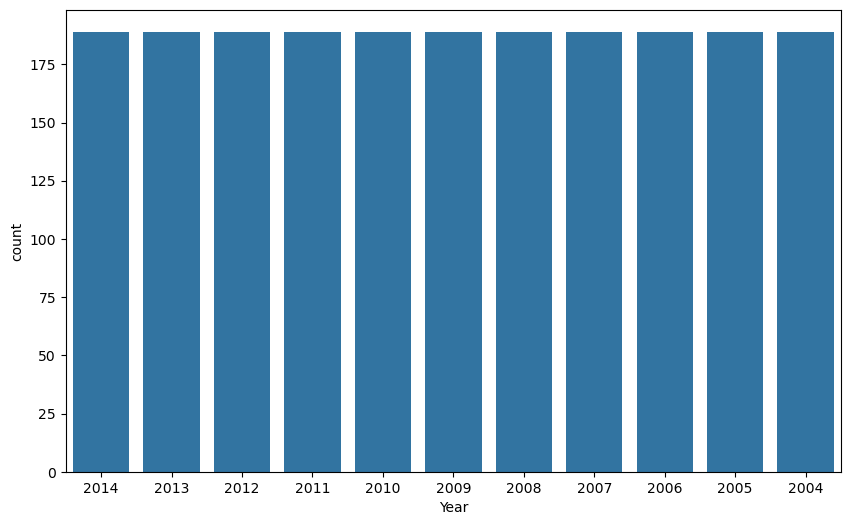

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=admissions_df)
plt.show()

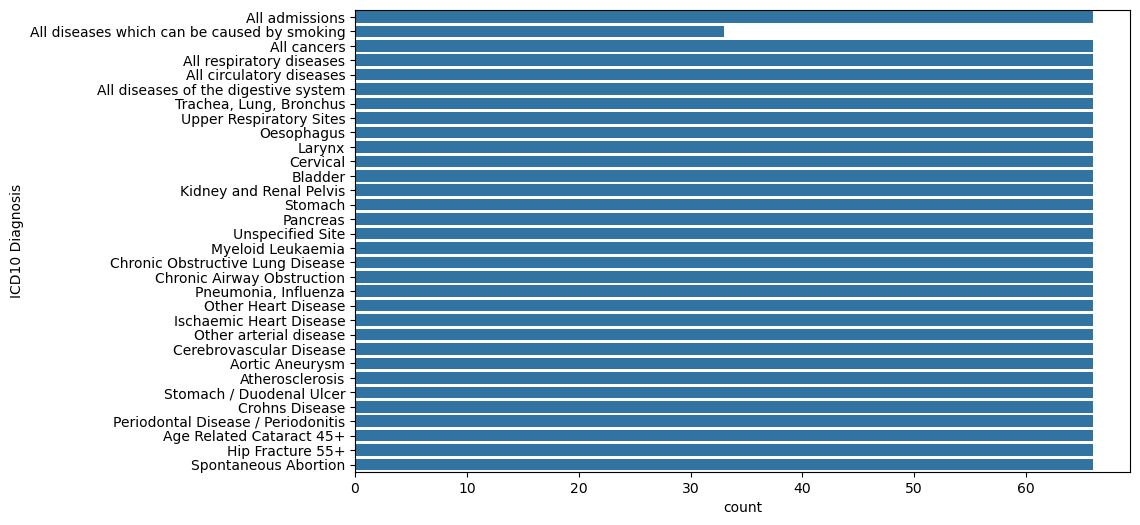

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y='ICD10 Diagnosis', data=admissions_df)
plt.show()

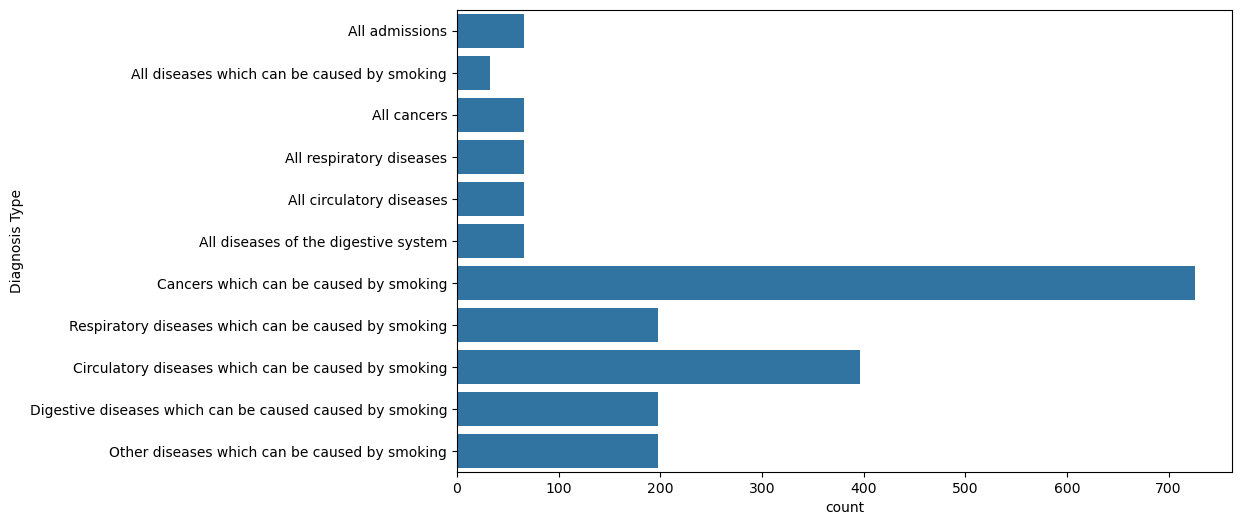

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y='Diagnosis Type', data=admissions_df)
plt.show()

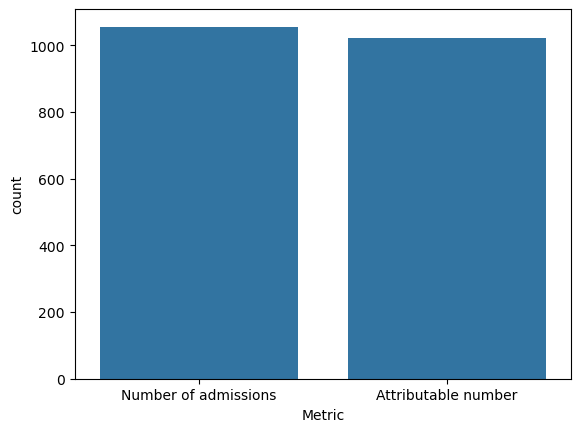

In [26]:
sns.countplot(x='Metric', data=admissions_df)
plt.show()

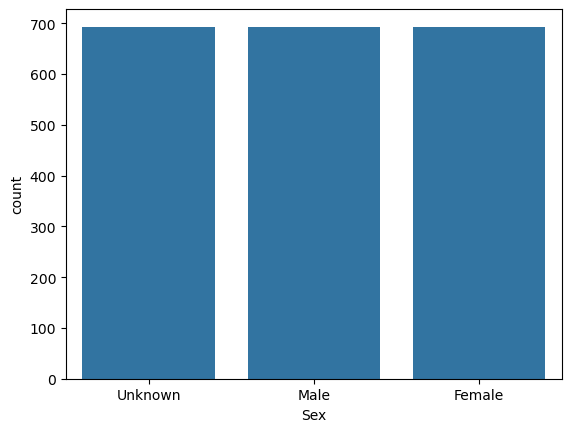

In [27]:
sns.countplot(x='Sex', data=admissions_df)
plt.show()

In [28]:
admissions_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All admissions,All admissions,Number of admissions,Unknown,11011882
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,Unknown,1713330
2,2014,C00-D48,All cancers,All cancers,Number of admissions,Unknown,1691035
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,Unknown,611002
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,Unknown,907157


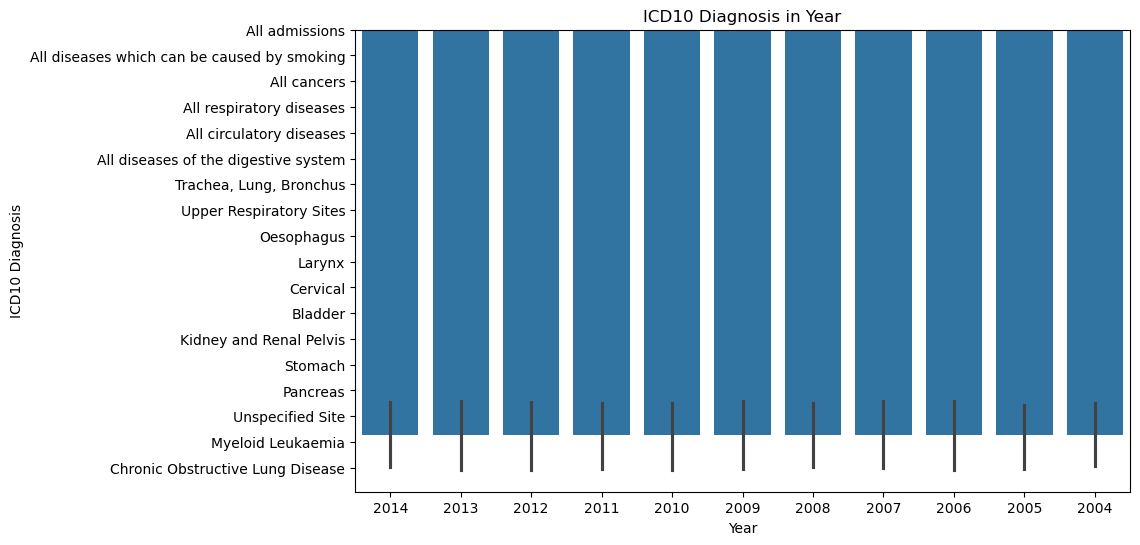

In [29]:
#ICD10 Diagnosis in year
plt.figure(figsize=(10,6))
sns.barplot(x = admissions_df['Year'], y = admissions_df['ICD10 Diagnosis'])
plt.title('ICD10 Diagnosis in Year')
plt.xlabel('Year')
plt.ylabel('ICD10 Diagnosis')
plt.show()

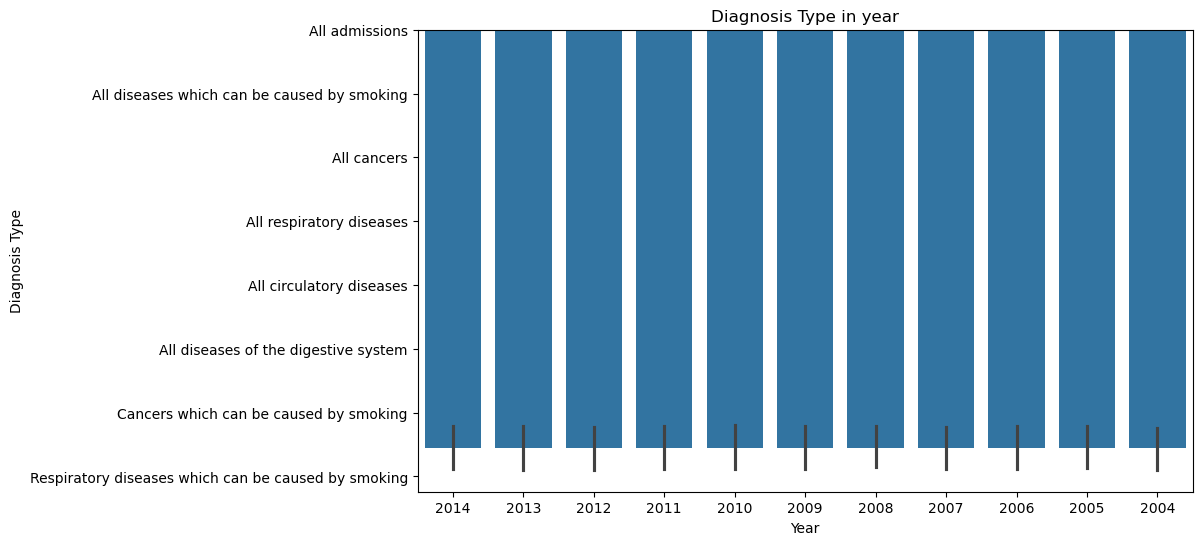

In [30]:
#Diagnosis Type in year
plt.figure(figsize=(10,6))
sns.barplot(x = admissions_df['Year'], y = admissions_df['Diagnosis Type'])
plt.title('Diagnosis Type in year')
plt.xlabel('Year')
plt.ylabel('Diagnosis Type')
plt.show()

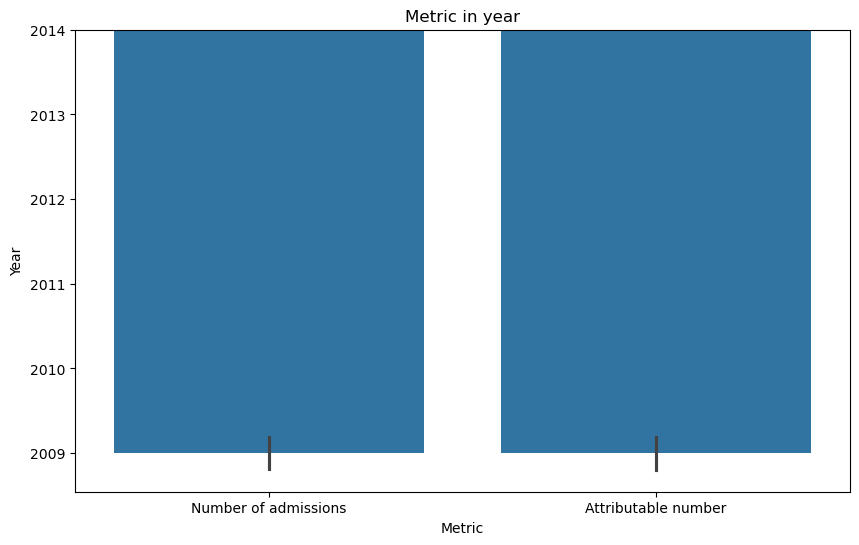

In [31]:
#Metric in Year
plt.figure(figsize=(10,6))
sns.barplot(y = admissions_df['Year'], x = admissions_df['Metric'])
plt.title('Metric in year')
plt.xlabel('Metric')
plt.ylabel('Year')
plt.show()

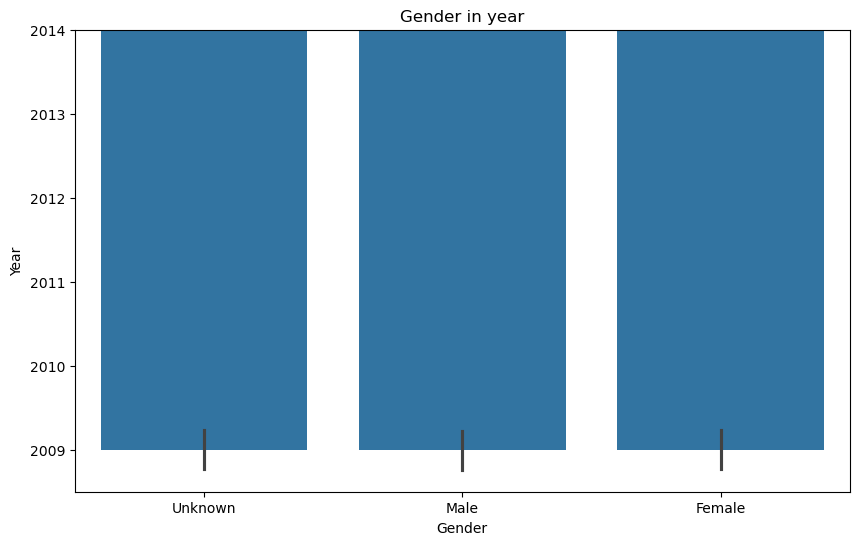

In [32]:
#Gender in year
plt.figure(figsize=(10,6))
sns.barplot(x = admissions_df['Sex'], y = admissions_df['Year'])
plt.title('Gender in year')
plt.xlabel('Gender')
plt.ylabel('Year')
plt.show()

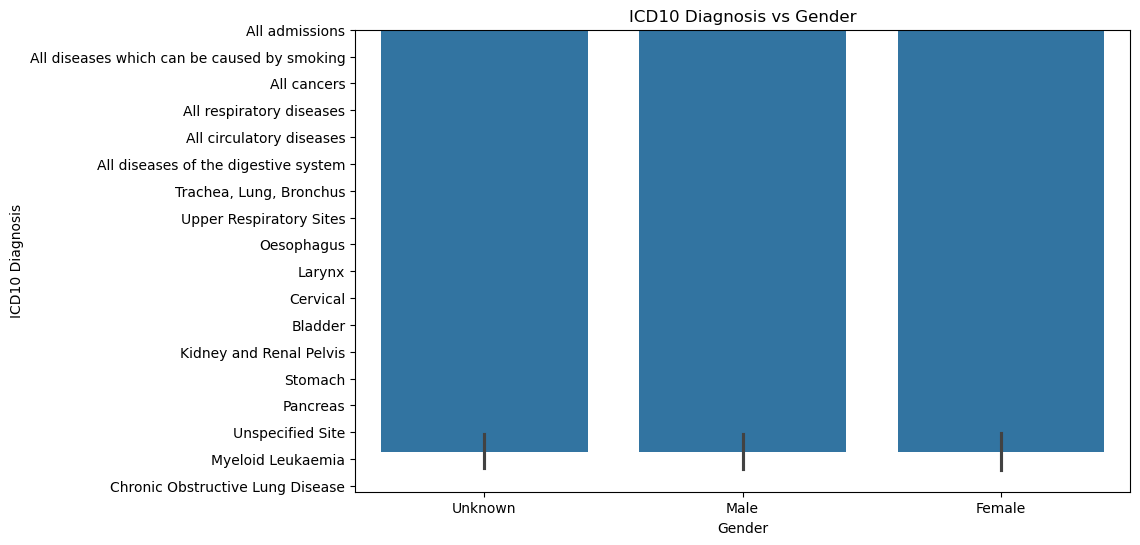

In [33]:
#ICD10 Diagnosis vs Gender
plt.figure(figsize=(10,6))
sns.barplot(x = admissions_df['Sex'], y = admissions_df['ICD10 Diagnosis'])
plt.title('ICD10 Diagnosis vs Gender')
plt.xlabel('Gender')
plt.ylabel('ICD10 Diagnosis')
plt.show()

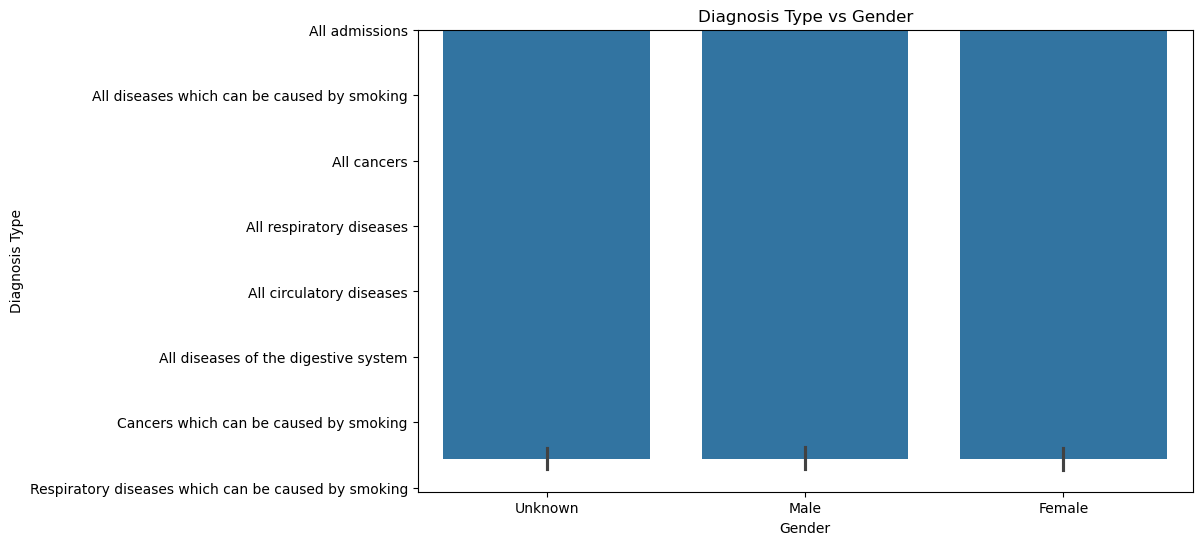

In [34]:
#Diagnosis Type vs Gender
plt.figure(figsize=(10,6))
sns.barplot(x = admissions_df['Sex'], y = admissions_df['Diagnosis Type'])
plt.title('Diagnosis Type vs Gender')
plt.xlabel('Gender')
plt.ylabel('Diagnosis Type')
plt.show()

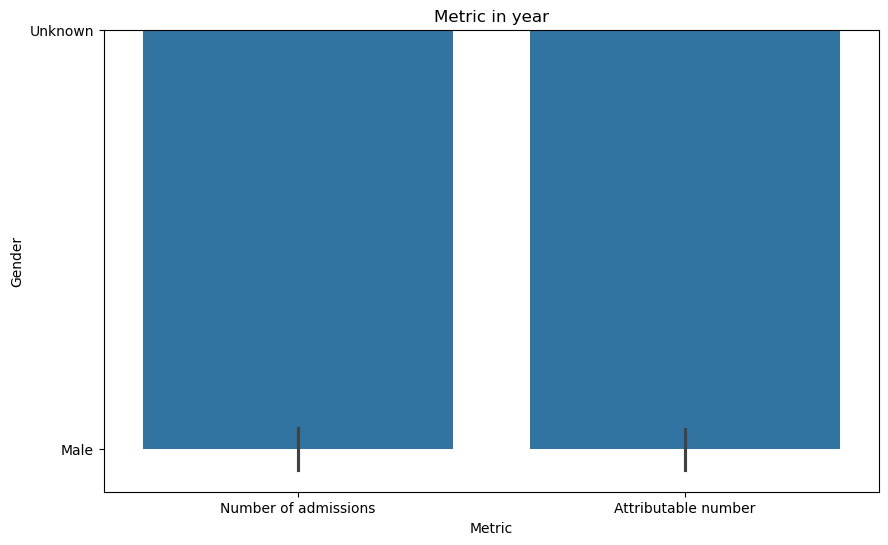

In [35]:
#Metric vs Gender
plt.figure(figsize=(10,6))
sns.barplot(y = admissions_df['Sex'], x = admissions_df['Metric'])
plt.title('Metric in year')
plt.xlabel('Metric')
plt.ylabel('Gender')
plt.show()

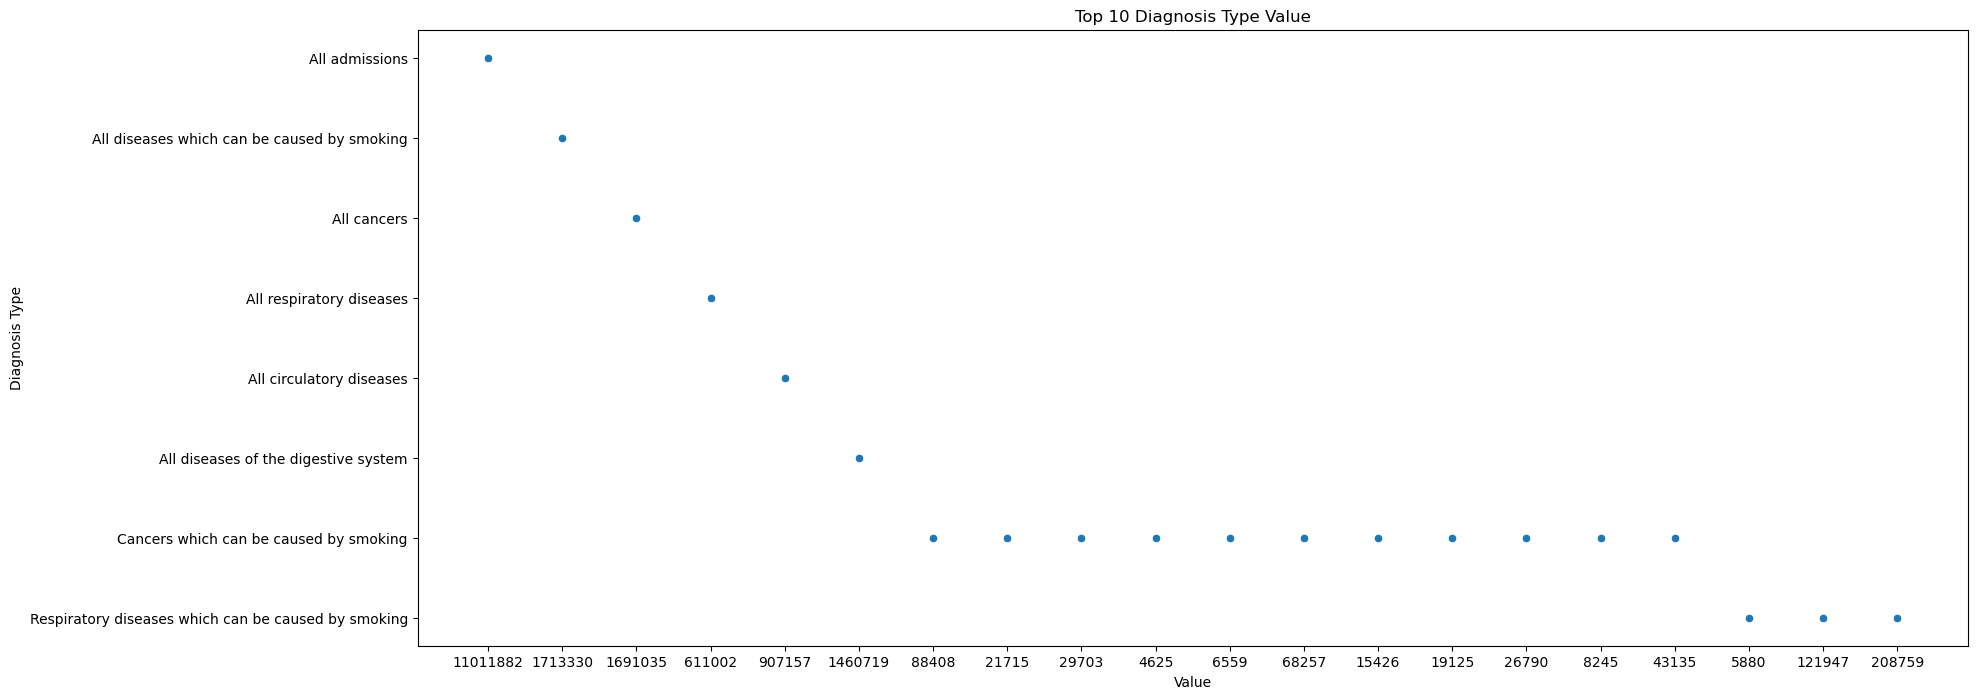

In [36]:
#Top 10 Diagnosis Type Value
plt.figure(figsize=(20,8))
sns.scatterplot(x = admissions_df['Value'].head(20), y = admissions_df['Diagnosis Type'])
plt.title('Top 10 Diagnosis Type Value')
plt.xlabel('Value')
plt.ylabel('Diagnosis Type')
plt.show()